## Winters, Alexander (V00970263)

# Problem 1. The American Job

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
import pandas as pd
# Plotting support
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
url = 'https://gist.githubusercontent.com/inumanag/713fb4367cacfeab82b07104482e73a7/raw/76a7ab7503476ce8f6a25269dc2755c13bbf5c36/elections.csv'
  
elections_df = pd.read_csv(url)
# print(pooled_us_elections.columns)
elections_df.shape

(3145, 78)

## 1.1 Bad Data

In [4]:
columns = elections_df.columns.values
count = 0
for col in columns:
    if elections_df[col].dtype == 'object':
        elections_df[col] = elections_df[col].apply(pd.to_numeric, errors='coerce')
        count += elections_df[col].isna().sum()
        
print("Number of nonsensical cells:", count)

Number of nonsensical cells: 5


In [5]:
elections_df.fillna(0, inplace=True)
# 17 is the key change
print(elections_df['POPULATION'].head(20))

0       1311.0
1     620961.0
2     156545.0
3       5559.0
4     190039.0
5      31594.0
6      43742.0
7       2343.0
8      16644.0
9      12010.0
10     99892.0
11     81625.0
12     50486.0
13     30952.0
14     13864.0
15     36903.0
16     49285.0
17         0.0
18     16667.0
19     20972.0
Name: POPULATION, dtype: float64


In [6]:
elections_df.isnull().sum().sum()

0

## 1.2 Split

In [7]:
url_two = 'https://raw.githubusercontent.com/kjhealy/us-county/master/data/census/fips-by-state.csv'

split_df = pd.read_csv(url_two, encoding='ISO-8859-1')
split_df.shape

(3143, 3)

In [8]:
split_df = split_df.rename(columns={'fips': 'FIPS', 'name': 'COUNTY', 'state': 'STATE'})

In [9]:
elections_df = pd.merge(elections_df, split_df, on=['FIPS'], how='left').fillna(0)
elections_df.shape

(3145, 80)

In [10]:
elections_df.drop('FIPS', inplace=True, axis=1)

In [11]:
elections_df.shape

(3145, 79)

## 1.3 Aggregate

In [12]:
education_features = ["PERCENT OF ADULTS WITH LESS THAN A HIGH SCHOOL DIPLOMA," ,
       "PERCENT OF ADULTS WITH A HIGH SCHOOL DIPLOMA ONLY," ,
       "PERCENT OF ADULTS COMPLETING SOME COLLEGE OR ASSOCIATE'S DEGREE," ,
       "PERCENT OF ADULTS WITH A BACHELOR'S DEGREE OR HIGHER,"]

# Inserts column name with highest third most represented education level
elections_df['EDUCATION'] = elections_df[education_features].apply(lambda row: row.nlargest(3).idxmin(), axis=1)

# Format text a little nicer
elections_df.replace(to_replace=education_features[0], value="Less than High School Diploma", regex=True, inplace=True)
elections_df.replace(to_replace=education_features[1], value="Only High School Diploma", regex=True, inplace=True)
elections_df.replace(to_replace=education_features[2], value="Some College or Associate's Degree", regex=True, inplace=True)
elections_df.replace(to_replace=education_features[3], value="Bachelor's Degree or Higher", regex=True, inplace=True)

# Drop old features
elections_df.drop(education_features, inplace=True, axis=1)

# Output
print(elections_df['EDUCATION'].describe())

count                            3145
unique                              4
top       Bachelor's Degree or Higher
freq                             1535
Name: EDUCATION, dtype: object


In [13]:
religious_features = ['AMISH', 'BUDDHIST', 'CATHOLIC',
       'CHRISTIAN GENERIC', 'EASTERN ORTHODOX', 'HINDU', 'JEWISH',
       'MAINLINE CHRISTIAN', 'MORMON', 'MUSLIM', 'NON-CATHOLIC CHRISTIAN',
       'OTHER', 'OTHER CHRISTIAN', 'OTHER MISC', 'PENTECOSTAL / CHARISMATIC',
       'PROTESTANT DENOMINATION', 'ZOROASTRIAN']

# Help from: 
# https://stackoverflow.com/questions/52464947/how-to-get-column-name-for-second-largest-row-value-in-pandas-dataframe
elections_df['RELIGION'] = elections_df[religious_features].apply(lambda row: row.nlargest(3).idxmin(), axis=1)

# Format text a little nicer
elections_df.replace(to_replace=religious_features[0], value="Amish", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[1], value="Buddhist", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[2], value="Catholic", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[3], value="Christian Generic", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[4], value="Eastern Orthodox", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[5], value="Hindu", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[6], value="Jewish", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[7], value="Mainline Christian", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[8], value="Mormon", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[9], value="Muslim", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[10], value="Non-Catholic Christian", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[11], value="Other", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[12], value="Other Christian", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[13], value="Other Misc", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[14], value="Pentecostal / Charismatic", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[15], value="Protestant Denomination", regex=True, inplace=True)
elections_df.replace(to_replace=religious_features[16], value="Zoroastrian", regex=True, inplace=True)

# Drop old features
elections_df.drop(religious_features, inplace=True, axis=1)

#Output
print(elections_df['RELIGION'].describe())

count                   3145
unique                    14
top       Mainline Christian
freq                    1731
Name: RELIGION, dtype: object


In [14]:
young_features = ['0-4 RATE', '5-9 RATE', '10-14 RATE', '15-19 RATE', '20-24 RATE']
middle_features = ['25-29 RATE', '30-34 RATE', '35-39 RATE', '40-44 RATE', '45-49 RATE',
       '50-54 RATE']
old_features = ['55-59 RATE', '60-64 RATE', '65-69 RATE', '70-74 RATE',
       '75-79 RATE', '80-84 RATE', '85+ RATE']

elections_df['AGE YOUNG'] = elections_df[young_features].sum(axis=1)
elections_df['AGE ADULT'] = elections_df[middle_features].sum(axis=1)
elections_df['AGE OLD'] = elections_df[old_features].sum(axis=1)

#Drop old features
elections_df.drop(young_features, inplace=True, axis=1)
elections_df.drop(middle_features, inplace=True, axis=1)
elections_df.drop(old_features, inplace=True, axis=1)

# Output:
print(elections_df['AGE YOUNG'].describe())
print(elections_df['AGE ADULT'].describe())
print(elections_df['AGE OLD'].describe())

count    3145.000000
mean        0.312977
std         0.047776
min         0.104743
25%         0.284771
50%         0.309424
75%         0.335255
max         0.576568
Name: AGE YOUNG, dtype: float64
count    3145.000000
mean        0.365155
std         0.035310
min         0.191949
25%         0.342695
50%         0.365658
75%         0.385777
max         0.554276
Name: AGE ADULT, dtype: float64
count    3145.000000
mean        0.262090
std         0.049825
min         0.059377
25%         0.229706
50%         0.260007
75%         0.290957
max         0.526104
Name: AGE OLD, dtype: float64


In [15]:
ethnic_male_features = ['WHITE MALE RATE', 'BLACK MALE RATE', 'NATIVE AMERICAN MALE RATE', 'ASIAN MALE RATE'
                        , 'HAWAIIAN PACIFIC MALE RATE', 'MULTI MALE RATE', ]
ethnic_female_features = ['WHITE FEMALE RATE', 'BLACK FEMALE RATE', 'NATIVE AMERICAN FEMALE RATE', 'ASIAN FEMALE RATE'
                          , 'HAWAIIAN PACIFIC FEMALE RATE', 'MULTI FEMALE RATE']

elections_df['ETHNIC MALE'] = elections_df[ethnic_male_features].apply(lambda x: x.nlargest(2).idxmin(), axis=1)
elections_df['ETHNIC FEMALE'] = elections_df[ethnic_female_features].apply(lambda y: y.nlargest(2).idxmin(), axis=1)

# Format text a little nicer
elections_df.replace(to_replace=ethnic_male_features[0], value="White Male", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_male_features[1], value="Black Male", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_male_features[2], value="Native American Male", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_male_features[3], value="Asian Male", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_male_features[4], value="Hawaiian Pacific Male", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_male_features[5], value="Multi Male", regex=True, inplace=True)

elections_df.replace(to_replace=ethnic_female_features[0], value="White Female", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_female_features[1], value="Black Female", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_female_features[2], value="Native American Female", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_female_features[3], value="Asian Female", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_female_features[4], value="Hawaiian Pacific Female", regex=True, inplace=True)
elections_df.replace(to_replace=ethnic_female_features[5], value="Multi Female", regex=True, inplace=True)

# Drop old features
elections_df.drop(ethnic_male_features, inplace=True, axis=1)
elections_df.drop(ethnic_female_features, inplace=True, axis=1)

# Output
print(elections_df['ETHNIC MALE'].describe())
print(elections_df['ETHNIC FEMALE'].describe())

count           3145
unique             6
top       Black Male
freq            1711
Name: ETHNIC MALE, dtype: object
count             3145
unique               4
top       Black Female
freq              2115
Name: ETHNIC FEMALE, dtype: object


In [16]:
#Remove unwanted features
elections_df.drop('POVERTY UNDER 18 PCT', inplace=True, axis=1)
elections_df.drop('HOUSING UNITS', inplace=True, axis=1)
elections_df.drop('AREA IN SQUARE MILES - WATER AREA', inplace=True, axis=1)
elections_df.drop('AREA IN SQUARE MILES - LAND AREA', inplace=True, axis=1)
elections_df.drop('DENSITY PER SQUARE MILE OF LAND AREA - HOUSING UNITS', inplace=True, axis=1)
elections_df.drop('AGE TOTAL POP', inplace=True, axis=1)
elections_df.drop('WHITE RATE', inplace=True, axis=1)
elections_df.drop('BLACK RATE', inplace=True, axis=1)
elections_df.drop('NATIVE AMERICAN RATE', inplace=True, axis=1)
elections_df.drop('HAWAIIAN PACIFIC RATE', inplace=True, axis=1)
elections_df.drop('MULTI RATE', inplace=True, axis=1)

In [17]:
elections_df.columns

Index(['VOTES', 'UNEMPLOYMENT RATE', 'POP ESTIMATE', 'MED HHINC',
       'PER CAPITA INC', 'POVERTY ALL AGES PCT', 'DEEP POV ALL',
       'DEEP POV CHILDREN', 'POPULATION', 'AREA IN SQUARE MILES - TOTAL AREA',
       'DENSITY PER SQUARE MILE OF LAND AREA - POPULATION', 'TOT MALE RATE',
       'TOT FEMALE RATE', 'VOTER TURNOUT RATE', 'DEMOCRAT', 'COUNTY', 'STATE',
       'EDUCATION', 'RELIGION', 'AGE YOUNG', 'AGE ADULT', 'AGE OLD',
       'ETHNIC MALE', 'ETHNIC FEMALE'],
      dtype='object')

## 1.4 Rename

In [18]:
elections_df = elections_df.rename(columns={'VOTES': 'votes', 'UNEMPLOYMENT RATE': 'unemployment', 
                                            'POP ESTIMATE': 'pop_estimate',
                            'MED HHINC': 'med_hh_inc', 'PER CAPITA INC': 'per_capita_inc', 
                            'POVERTY ALL AGES PCT': 'poverty_all_ages', 'DEEP POV ALL': 'deep_pov_all',
                            'DEEP POV CHILDREN': 'deep_pov_children', 'POPULATION': 'population',
                            'AREA IN SQUARE MILES - TOTAL AREA': 'total_area', 'TOT MALE RATE': 'total_male',
                            'TOT FEMALE RATE': 'total_female', 'VOTER TURNOUT RATE': 'voter_turnout', 
                            'DEMOCRAT': 'democrat', 'COUNTY': 'county', 'STATE': 'state', 'EDUCATION': 'education', 
                            'RELIGION': 'religion', 'AGE YOUNG': 'age_young', 'AGE ADULT': 'age_adult', 
                            'AGE OLD': 'age_old', 'ETHNIC MALE': 'ethnic_male', 'ETHNIC FEMALE': 'ethnic_female',
                            'DENSITY PER SQUARE MILE OF LAND AREA - POPULATION': 'pop_density'
                            })

In [19]:
elections_df.columns

Index(['votes', 'unemployment', 'pop_estimate', 'med_hh_inc', 'per_capita_inc',
       'poverty_all_ages', 'deep_pov_all', 'deep_pov_children', 'population',
       'total_area', 'pop_density', 'total_male', 'total_female',
       'voter_turnout', 'democrat', 'county', 'state', 'education', 'religion',
       'age_young', 'age_adult', 'age_old', 'ethnic_male', 'ethnic_female'],
      dtype='object')

## 1.5 Normalize

In [20]:
elections_df['per_capita_inc'] = (elections_df['per_capita_inc'] - elections_df['per_capita_inc'].mean()) / elections_df['per_capita_inc'].std()
elections_df['med_hh_inc'] = (elections_df['med_hh_inc'] - elections_df['med_hh_inc'].mean()) / elections_df['med_hh_inc'].std()
elections_df['pop_estimate'] = (elections_df['pop_estimate'] - elections_df['pop_estimate'].mean()) / elections_df['pop_estimate'].std()
elections_df['population'] = (elections_df['population'] - elections_df['population'].mean()) / elections_df['population'].std()
elections_df['pop_density'] = (elections_df['pop_density'] - elections_df['pop_density'].mean()) / elections_df['pop_density'].std()
elections_df['total_area'] = (elections_df['total_area'] - elections_df['total_area'].mean()) / elections_df['total_area'].std()
print("Normalized Per Capita Inc:")
print(elections_df['per_capita_inc'].describe())
print("\nNormalized Med HH Inc:")
print(elections_df['med_hh_inc'].describe())
print("\nNormalized Pop Estimate:")
print(elections_df['pop_estimate'].describe())
print("\nNormalized Population:")
print(elections_df['population'].describe())
print("\nNormalized Pop Density:")
print(elections_df['pop_density'].describe())
print("\nNormalized Total Area:")
print(elections_df['total_area'].describe())


Normalized Per Capita Inc:
count    3.145000e+03
mean     8.415808e-17
std      1.000000e+00
min     -2.781910e+00
25%     -6.644255e-01
50%     -1.191829e-01
75%      4.784971e-01
max      6.935650e+00
Name: per_capita_inc, dtype: float64

Normalized Med HH Inc:
count    3.145000e+03
mean    -2.435783e-16
std      1.000000e+00
min     -2.106847e+00
25%     -6.802147e-01
50%     -1.565321e-01
75%      4.507249e-01
max      6.488410e+00
Name: med_hh_inc, dtype: float64

Normalized Pop Estimate:
count    3.145000e+03
mean     2.947651e-17
std      1.000000e+00
min     -3.126906e-01
25%     -2.797866e-01
50%     -2.352555e-01
75%     -1.075193e-01
max      3.039380e+01
Name: pop_estimate, dtype: float64

Normalized Population:
count    3.145000e+03
mean    -1.704166e-17
std      1.000000e+00
min     -3.138100e-01
25%     -2.784343e-01
50%     -2.312016e-01
75%     -1.011049e-01
max      3.107425e+01
Name: population, dtype: float64

Normalized Pop Density:
count    3.145000e+03
mean     2

## 1.5 Rate Features

In [21]:
elections_df['unemployment'] = elections_df['unemployment'] / 100
elections_df['poverty_all_ages'] = elections_df['poverty_all_ages'] / 100
elections_df['deep_pov_all'] = elections_df['deep_pov_all'] / 100
elections_df['voter_turnout'] = elections_df['voter_turnout'] / 100

print("Unemployment Rate: ")
print(elections_df['unemployment'].describe())
print("\nAll Age Poverty Rate: ")
print(elections_df['poverty_all_ages'].describe())
print("\nDeep Poverty Rate: ")
print(elections_df['deep_pov_all'].describe())
print("\nVoter Turnover Rate: ")
print(elections_df['voter_turnout'].describe())


Unemployment Rate: 
count    3145.000000
mean        0.055358
std         0.020226
min         0.018000
25%         0.042000
50%         0.053000
75%         0.065000
max         0.240000
Name: unemployment, dtype: float64

All Age Poverty Rate: 
count    3145.000000
mean        0.168313
std         0.064270
min         0.032000
25%         0.121000
50%         0.158000
75%         0.203000
max         0.474000
Name: poverty_all_ages, dtype: float64

Deep Poverty Rate: 
count    3145.000000
mean        0.070582
std         0.033496
min         0.000000
25%         0.047255
50%         0.065468
75%         0.085610
max         0.278103
Name: deep_pov_all, dtype: float64

Voter Turnover Rate: 
count    3145.000000
mean        0.004503
std         0.003254
min         0.000064
25%         0.003847
50%         0.004379
75%         0.004916
max         0.121876
Name: voter_turnout, dtype: float64


## 1.6 Summary

In [22]:
print("New Name: pop_estimate")
print("Mean:", elections_df['pop_estimate'].mean(), "Std:", elections_df['pop_estimate'].std())

print("\nNew Name: population")
print("Mean:", elections_df['population'].mean(), "Std:", elections_df['population'].std())

corr = elections_df['pop_estimate'].astype('int').corr(elections_df['population'].astype('int'))
print("\nCorrelation between pop_estimate and population:", corr)
if(corr > 0.9):
    print("pop_estimate and population are correlated, column dropped")
    elections_df.drop('pop_estimate', inplace=True, axis=1)
else:
    print("pop_estimate and population are not correlated")

New Name: pop_estimate
Mean: 2.947650955682053e-17 Std: 1.0000000000000002

New Name: population
Mean: -1.7041658668928277e-17 Std: 0.999999999999998

Correlation between pop_estimate and population: 0.9885961891884621
pop_estimate and population are correlated, column dropped


In [23]:
print("New Namne: voter_turnout")
print("Median:", elections_df['voter_turnout'].median(), "Q1:", elections_df['voter_turnout'].quantile(0.25),
     "Q2:", elections_df['voter_turnout'].quantile(0.5), "Q3:", elections_df['voter_turnout'].quantile(0.75),
     "IQR: " + str(elections_df['voter_turnout'].quantile(0.75) - elections_df['voter_turnout'].quantile(0.25)))
      
print("\nNew Namne: unemployment")
print("Median:", elections_df['unemployment'].median(), "Q1:", elections_df['unemployment'].quantile(0.25),
     "Q2:", elections_df['unemployment'].quantile(0.5), "Q3:", elections_df['unemployment'].quantile(0.75),
     "IQR: " + str(elections_df['unemployment'].quantile(0.75) - elections_df['unemployment'].quantile(0.25)))

New Namne: voter_turnout
Median: 0.00437938691 Q1: 0.00384746083 Q2: 0.00437938691 Q3: 0.00491628378 IQR: 0.0010688229499999998

New Namne: unemployment
Median: 0.053 Q1: 0.042 Q2: 0.053 Q3: 0.065 IQR: 0.023


In [24]:
print("Religious and Ethnic Female Feature Mode:\n" + str((elections_df['religion'].mode()[0]  + '\n' 
                                                                   + elections_df['ethnic_female']).mode()[0]))

Religious and Ethnic Female Feature Mode:
Mainline Christian
Black Female


## 1.7 Vizualization

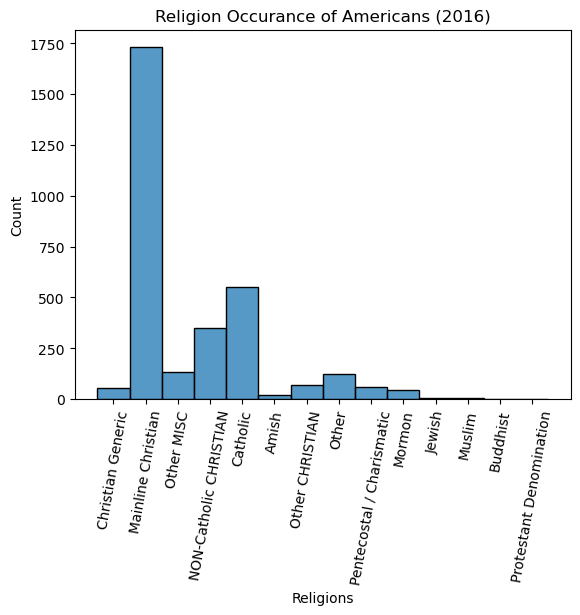

In [25]:
religion_ax = sns.histplot(data=elections_df['religion']).set(title='Religion Occurance of Americans (2016)'
                                                              , xlabel='Religions')

locs, labels = plt.xticks()
plt.setp(labels, rotation=80);

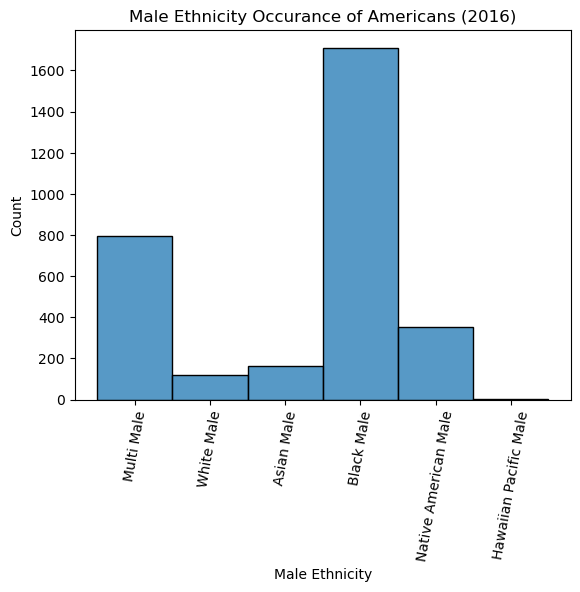

In [26]:
ethnic_male_ax = sns.histplot(data=elections_df['ethnic_male']).set(title='Male Ethnicity Occurance of Americans (2016)'
                                                                    , xlabel='Male Ethnicity')

locs, labels = plt.xticks()
plt.setp(labels, rotation=80);

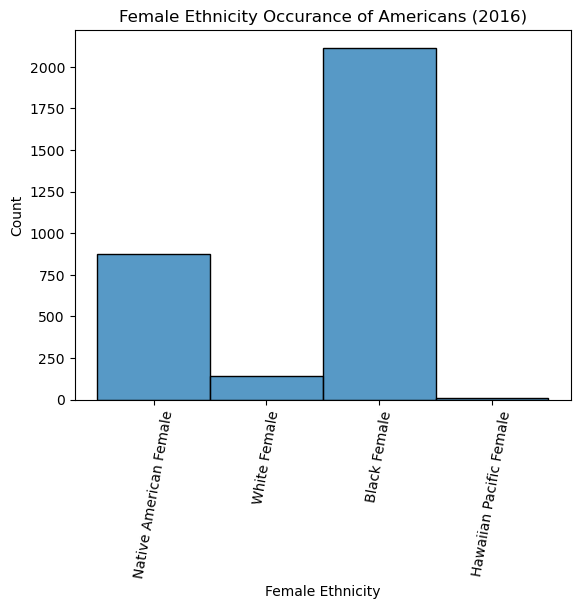

In [27]:
ethnic_female_ax = sns.histplot(data=elections_df['ethnic_female']).set(
    title='Female Ethnicity Occurance of Americans (2016)', xlabel='Female Ethnicity')

locs, labels = plt.xticks()
plt.setp(labels, rotation=80);

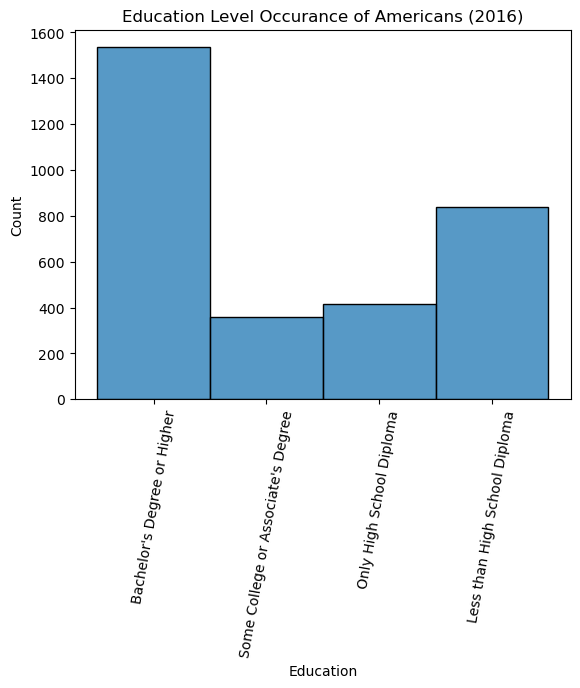

In [28]:
education_ax = sns.histplot(data=elections_df['education']).set(title='Education Level Occurance of Americans (2016)'
                                                                , xlabel='Education')

locs, labels = plt.xticks()
plt.setp(labels, rotation=80);

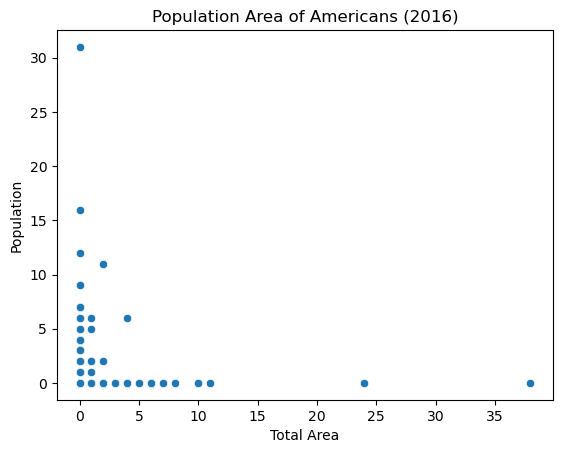

In [29]:
area_pop_ax = sns.scatterplot(x=elections_df['total_area'].astype('int'), y=elections_df['population'].astype('int')).set(
    title='Population Area of Americans (2016)', xlabel='Total Area', ylabel='Population')

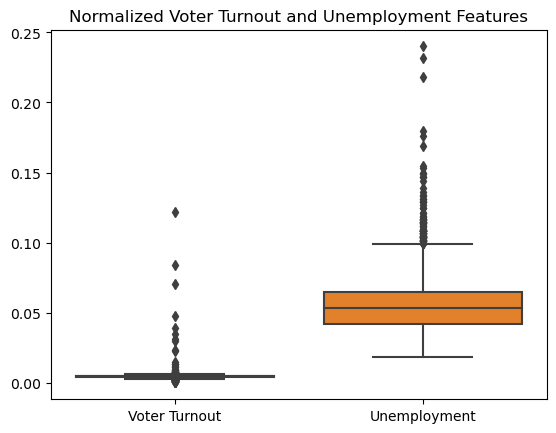

In [30]:
voter_unemployment_ax = sns.boxplot(data=[elections_df['voter_turnout'], elections_df['unemployment']]).set(
    title="Normalized Voter Turnout and Unemployment Features")

plt.xticks(plt.xticks()[0], ['Voter Turnout', 'Unemployment']);

## 1.8 Conflict

Conflicts occur when two samples in the dataset have all the same inputs/features but lead to a different output/label. In our case, the elections_clean dataset never has a sample that is exactly the same as the other, due to the fact that all features are continuous. 

However, when features are not continuous, there are many casses when the data is non-sensical.

Non-sensical samples could look as follows:
1) Education: Some College or Associate's Degree, Religion: Christian Generic, Ethnic Male: Multi Male, Ethnic Female: Native American Female, Democrat: 0

2) Education: Some College or Associate's Degree, Religion: Christian Generic, Ethnic Male: Multi Male, Ethnic Female: Native American Female, Democrat: 1

These features are the same except for the Democrat value, leading to non-sensical/contradicting samples.

## 1.9 Labels

I believe the name of the vector label for this dataset is 'Democrat'. This is because all features have respect to whether the county in a state is 'Democrat' or not (True or False). 

## Result

In [31]:
elections_df.shape

(3145, 23)

In [32]:
elections_df.describe()

,votes,unemployment,med_hh_inc,per_capita_inc,poverty_all_ages,deep_pov_all,deep_pov_children,population,total_area,pop_density,total_male,total_female,voter_turnout,democrat,age_young,age_adult,age_old
count,3.145000e+03,3145.000000,3.145000e+03,3.145000e+03,3145.000000,3145.000000,3145.000000,3.145000e+03,3.145000e+03,3.145000e+03,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000,3145.000000
mean,4.025041e+04,0.055358,-2.435783e-16,8.415808e-17,0.168313,0.070582,10.379254,-1.704166e-17,6.824606e-16,2.273045e-16,0.500346,0.499453,0.004503,0.154531,0.312977,0.365155,0.262090
std,1.061758e+05,0.020226,1.000000e+00,1.000000e+00,0.064270,0.033496,5.987177,1.000000e+00,1.000000e+00,1.000000e+00,0.022149,0.022076,0.003254,0.361514,0.047776,0.035310,0.049825
min,6.400000e+01,0.018000,-2.106847e+00,-2.781910e+00,0.032000,0.000000,0.000000,-3.138100e-01,-3.153133e-01,-1.519733e-01,0.432608,0.284790,0.000064,0.000000,0.104743,0.191949,0.059377
25%,4.870000e+03,0.042000,-6.802147e-01,-6.644255e-01,0.121000,0.047255,6.086677,-2.784343e-01,-1.992727e-01,-1.421187e-01,0.489216,0.495062,0.003847,0.000000,0.284771,0.342695,0.229706
50%,1.073600e+04,0.053000,-1.565321e-01,-1.191829e-01,0.158000,0.065468,9.471154,-2.312016e-01,-1.455282e-01,-1.257138e-01,0.496125,0.503566,0.004379,0.000000,0.309424,0.365658,0.260007
75%,2.794100e+04,0.065000,4.507249e-01,4.784971e-01,0.203000,0.085610,13.353824,-1.011049e-01,-5.743403e-02,-8.554211e-02,0.504938,0.510395,0.004916,0.000000,0.335255,0.385777,0.290957
max,2.240323e+06,0.240000,6.488410e+00,6.935650e+00,0.474000,0.278103,44.973545,3.107425e+01,3.831330e+01,4.011738e+01,0.715210,0.567392,0.121876,1.000000,0.576568,0.554276,0.526104


In [33]:
elections_df.to_csv('elections_clean.csv', index=False)